In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Santdard Imports

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob


# Data Processing & adding Labels

In [87]:
tumor = []
healthy = []
for f in glob.iglob("/content/drive/MyDrive/braintumor_split_2/train_2/yes/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    tumor.append(img)

for f in glob.iglob("/content/drive/MyDrive/braintumor_split_2/train_2/no/*.jpg"):
    img = cv2.imread(f)
    img = cv2.resize(img,(128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r,g,b])
    healthy.append(img)


healthy = np.array(healthy)
tumor = np.array(tumor)

healthy = healthy / 255.0
tumor = tumor / 255.0

All = np.concatenate((healthy, tumor))

healthy_labels = np.zeros(len(healthy))
tumor_labels = np.ones(len(tumor))
labels = np.concatenate((healthy_labels, tumor_labels))

## Dataset Images

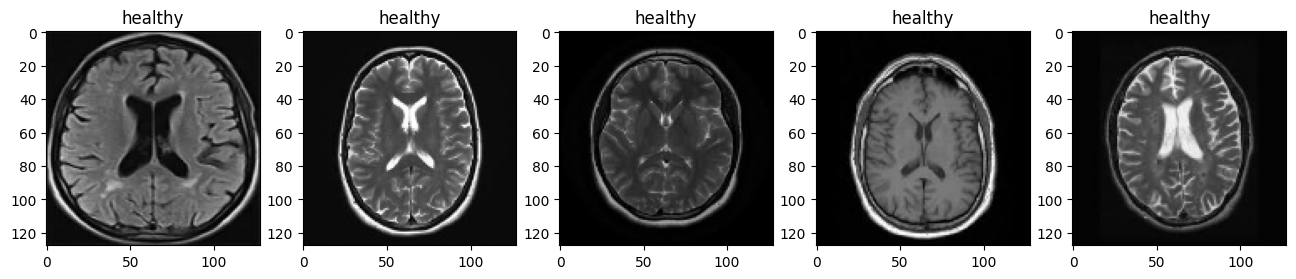

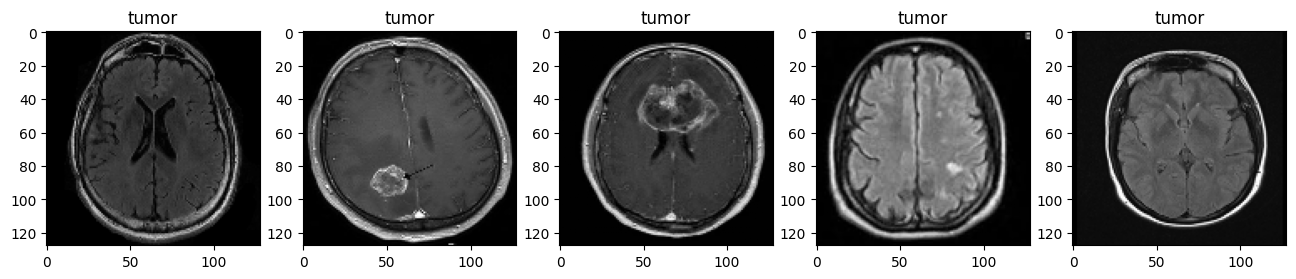

In [88]:
def plot_random(healthy, tumor, num=5):
    healthy_imgs = healthy[np.random.choice(healthy.shape[0], num, replace=False)]
    tumor_imgs = tumor[np.random.choice(tumor.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('tumor')
        plt.imshow(tumor_imgs[i])

plot_random(healthy, All, num=5)

# Deep Learning Model

### Train-Val Split

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(All,labels,test_size=0.2,random_state=42)

## CNN model

In [91]:
import tensorflow as tf
from tensorflow.keras import layers

class SimpleCNN(tf.keras.Model):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128, 128, 3))
        self.pool1 = layers.MaxPooling2D(pool_size=2)

        self.conv2 = layers.Conv2D(filters=64, kernel_size=3, activation='relu')
        self.pool2 = layers.MaxPooling2D(pool_size=2)

        self.conv3 = layers.Conv2D(filters=128, kernel_size=3, activation='relu')
        self.pool3 = layers.MaxPooling2D(pool_size=2)

        self.flatten = layers.Flatten()

        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')

        self.fc3 = layers.Dense(1, activation='sigmoid')

        self.dropout1 = layers.Dropout(0.5)
        self.dropout2 = layers.Dropout(0.5)

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = self.pool3(x)

        x = self.flatten(x)
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

model = SimpleCNN()

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "simple_cnn_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [101]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 406ms/step - accuracy: 0.9316 - loss: 0.1936 - val_accuracy: 0.8519 - val_loss: 0.3588 - learning_rate: 1.0000e-04
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9332 - loss: 0.1756 - val_accuracy: 0.7037 - val_loss: 0.5294 - learning_rate: 1.0000e-04
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9180 - loss: 0.1895 - val_accuracy: 0.7778 - val_loss: 0.3918 - learning_rate: 1.0000e-04
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9721 - loss: 0.1397 - val_accuracy: 0.7778 - val_loss: 0.4261 - learning_rate: 1.0000e-04
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9778 - loss: 0.1158 - val_accuracy: 0.7778 - val_loss: 0.4079 - learning_rate: 1.0000e-04
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9669 - loss: 0.1252 - val_accuracy: 0.8519 - val_loss: 0.3517 - learning_rate: 1.0000e-04
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9669 - loss

## Visual Analysis

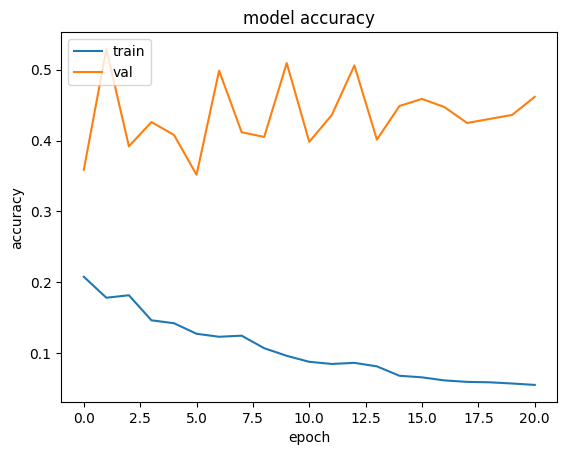

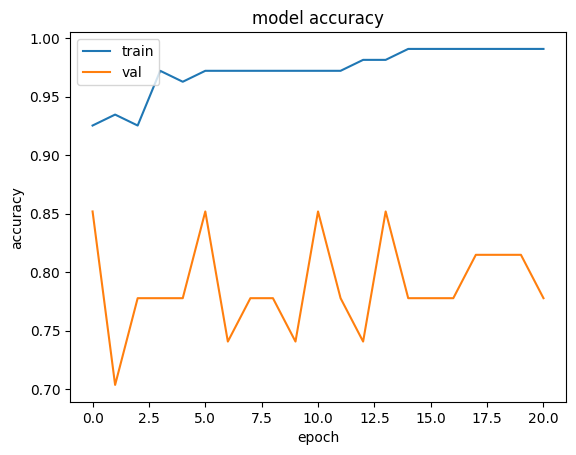

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step


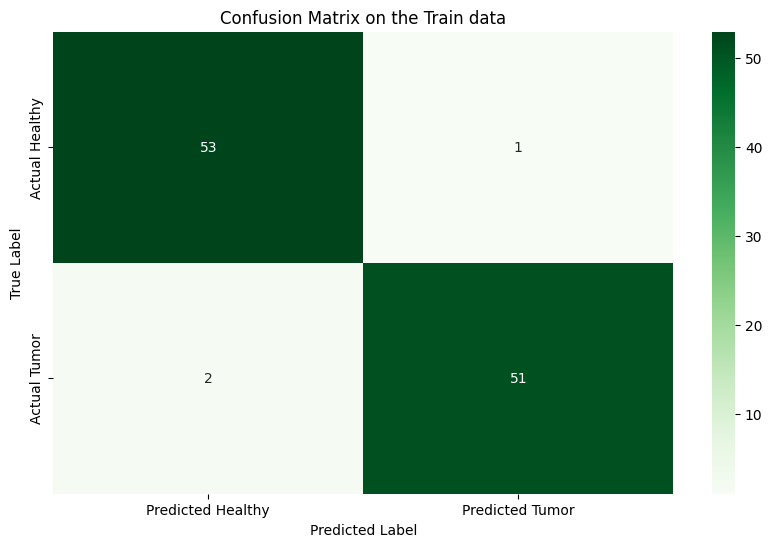

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_train)
y_pred_classes = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_train, y_pred_classes)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d',cmap = 'Greens',
            xticklabels=['Predicted Healthy', 'Predicted Tumor'],
            yticklabels=['Actual Healthy', 'Actual Tumor'])
plt.title('Confusion Matrix on the Train data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Validation Results

In [105]:
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8519 - loss: 0.3517
Test Loss: 0.3516952097415924, Test Accuracy: 0.8518518805503845


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


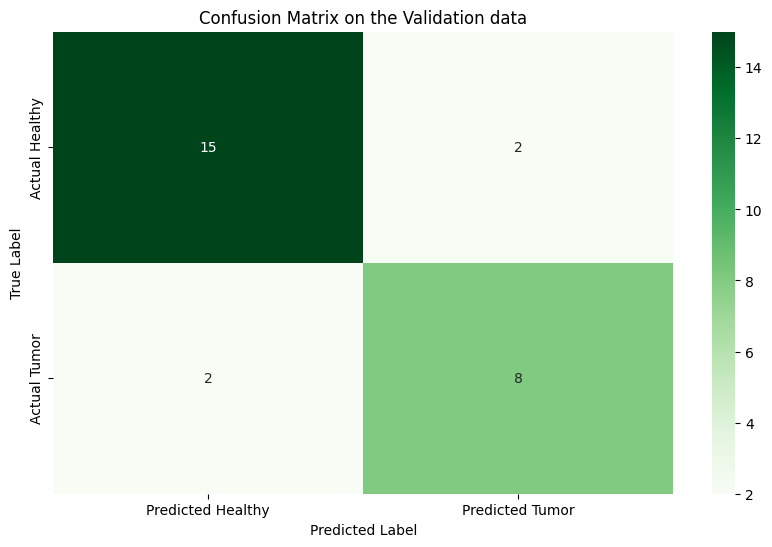

In [104]:
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_val, y_pred_classes)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d',cmap = "Greens",
            xticklabels=['Predicted Healthy', 'Predicted Tumor'],
            yticklabels=['Actual Healthy', 'Actual Tumor'])
plt.title('Confusion Matrix on the Validation data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Testing the Model

## Test data preprocessing

In [106]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def predict_tumor_or_healthy(image_path):
    img_array = preprocess_image(image_path)

    prediction = model.predict(img_array)
    print(f'The prediction  :{prediction}')
    print(f'The prediction value :{prediction[0]}')

    if prediction[0] > 0.5:
        print("The image is predicted as: Tumor")
    else:
        print("The image is predicted as: Healthy")

    img = image.load_img(image_path)
    plt.imshow(img)
    plt.title(f"Prediction: {'Tumor' if prediction[0] > 0.5 else 'Healthy'}")
    plt.axis('off')
    plt.show()


## Add your test image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
The prediction  :[[0.72315985]]
The prediction value :[0.72315985]
The image is predicted as: Tumor


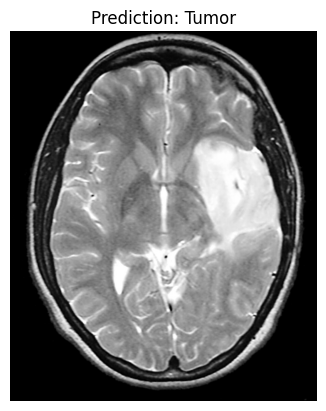

In [109]:
image_path = '/content/drive/MyDrive/braintumor_split_2/test_2/yes/Y91.jpg'
predict_tumor_or_healthy(image_path)

#EXP